In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Sample dataset
data = {
    "Study_Hours": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Sleep_Hours": [8, 7, 6, 6, 5, 5, 4, 4, 3, 2],
    "Pass":        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0=Fail, 1=Pass
}


In [2]:
data

{'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Sleep_Hours': [8, 7, 6, 6, 5, 5, 4, 4, 3, 2],
 'Pass': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]}

In [3]:
import pandas as pd

df = pd.DataFrame(data)
print(df.head())
print(df.info())
print(df.describe())


   Study_Hours  Sleep_Hours  Pass
0            1            8     0
1            2            7     0
2            3            6     0
3            4            6     0
4            5            5     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study_Hours  10 non-null     int64
 1   Sleep_Hours  10 non-null     int64
 2   Pass         10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes
None
       Study_Hours  Sleep_Hours       Pass
count     10.00000    10.000000  10.000000
mean       5.50000     5.000000   0.600000
std        3.02765     1.825742   0.516398
min        1.00000     2.000000   0.000000
25%        3.25000     4.000000   0.000000
50%        5.50000     5.000000   1.000000
75%        7.75000     6.000000   1.000000
max       10.00000     8.000000   1.000000


In [4]:
print(df.isnull().sum())   # Check null values

# Example fixes:
df = df.dropna()   # drop missing values
# OR
df = df.fillna(df.mean())   # fill with mean (numeric features)


Study_Hours    0
Sleep_Hours    0
Pass           0
dtype: int64


In [5]:
df = df.drop_duplicates()


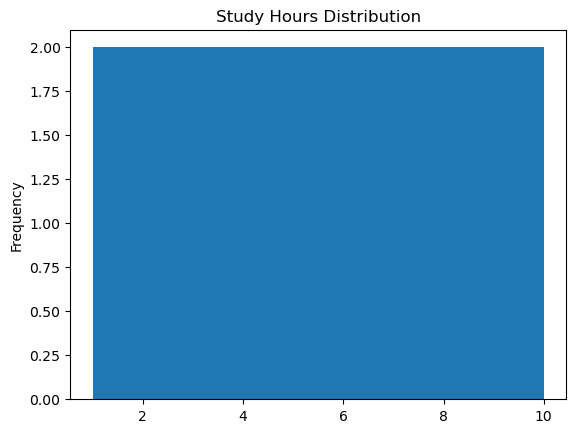

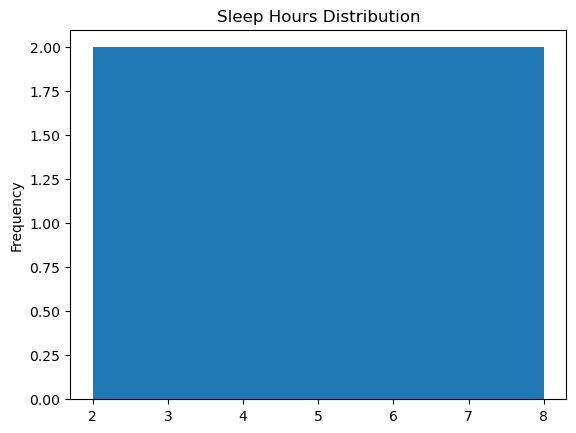

In [6]:
import matplotlib.pyplot as plt

# Study Hours Distribution
df["Study_Hours"].plot(kind="hist", bins=5, title="Study Hours Distribution")
plt.show()

# Sleep Hours Distribution
df["Sleep_Hours"].plot(kind="hist", bins=5, title="Sleep Hours Distribution")
plt.show()


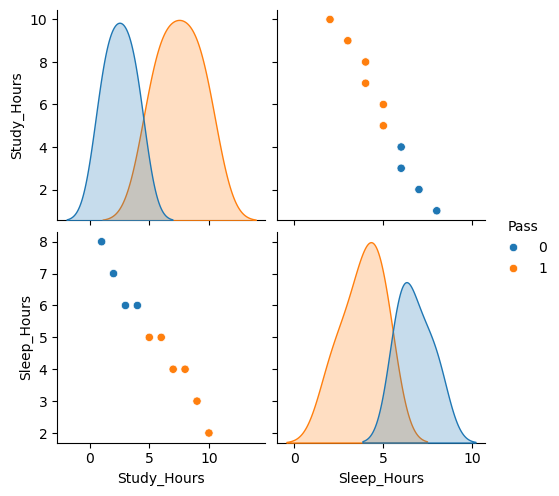

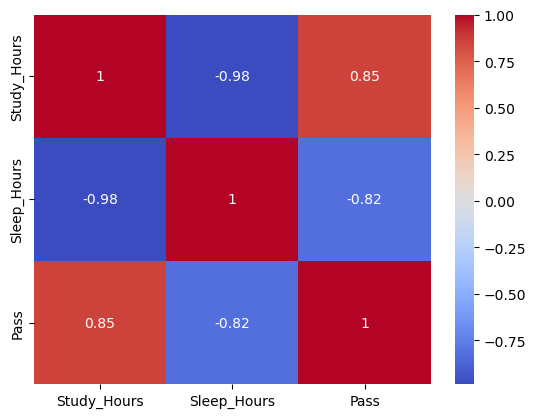

In [7]:
import seaborn as sns

# Pairplot
sns.pairplot(df, hue="Pass")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [8]:

X = df[["Study_Hours", "Sleep_Hours"]]
y = df["Pass"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# ------------------------------
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train_scaled , y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score
# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0
